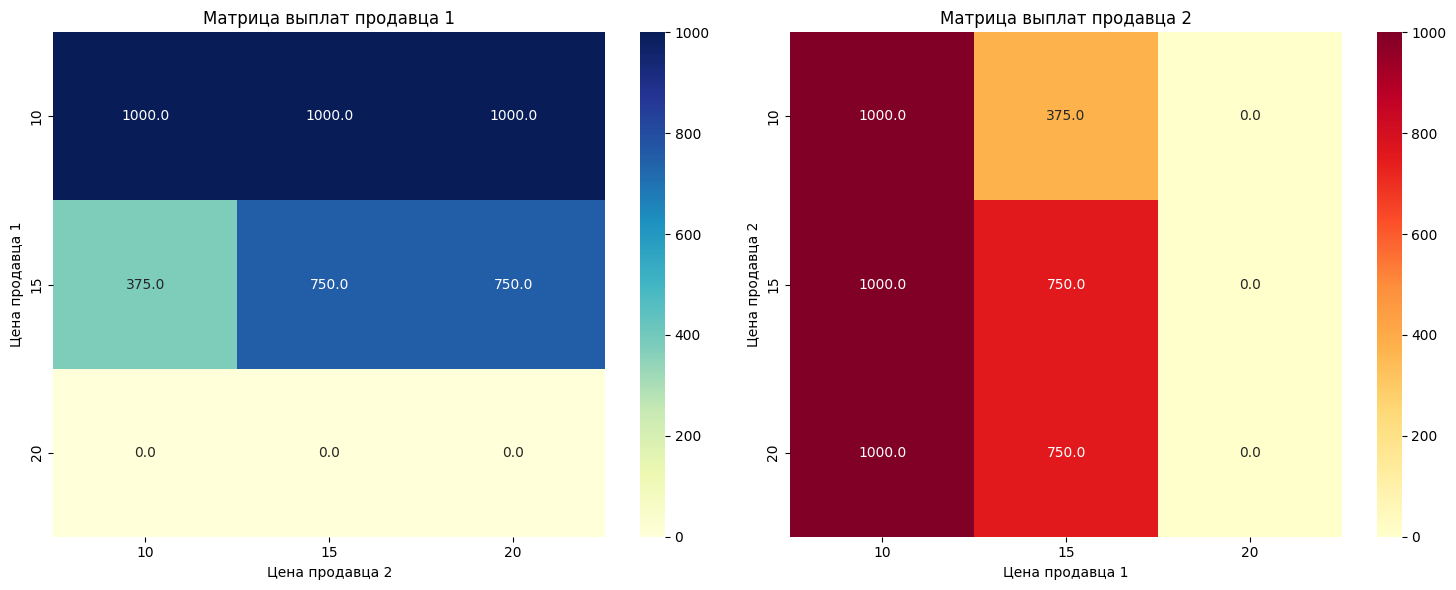

Равновесия Нэша для продавцов:
Стратегия продавца 1: [1. 0. 0.], Стратегия продавца 2: [1. 0. 0.]
Прибыль продавца 1: 1000.0, Прибыль продавца 2: 1000.0


In [7]:
!pip install nashpy

import numpy as np
import nashpy as nash
import seaborn as sns
import matplotlib.pyplot as plt

# Количество продавцов и товаров
num_sellers = 2  # Два продавца
num_goods = 2    # Два товара

# Цены, которые могут назначить продавцы для каждого товара (одинаковый набор стратегий для каждого продавца)
price_strategies = [10, 15, 20]

# Предпочтения покупателей к товарам
buyer_preferences = np.array([[0.6, 0.4], [0.3, 0.7], [0.5, 0.5]])

# Функция, моделирующая спрос как функцию цены
def demand(price):
    return max(0, 100 - price * 5)

# Функция прибыли для продавцов
def profit_seller(price_seller, price_opponent, preferences):
    total_demand = 0
    for i in range(len(preferences)):
        preferred_item = np.argmax(preferences[i] / np.array([price_seller, price_opponent]))
        if preferred_item == 0:
            total_demand += demand(price_seller)
    return price_seller * total_demand

# Строим матрицы выплат для продавцов
payoff_matrix_seller1 = np.zeros((len(price_strategies), len(price_strategies)))
payoff_matrix_seller2 = np.zeros((len(price_strategies), len(price_strategies)))

for i, p1 in enumerate(price_strategies):
    for j, p2 in enumerate(price_strategies):
        payoff_matrix_seller1[i, j] = profit_seller(p1, p2, buyer_preferences)
        payoff_matrix_seller2[i, j] = profit_seller(p2, p1, buyer_preferences)

# Визуализация матриц выплат с помощью seaborn
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.heatmap(payoff_matrix_seller1, annot=True, fmt=".1f", cmap="YlGnBu", xticklabels=price_strategies, yticklabels=price_strategies, ax=axes[0])
axes[0].set_title("Матрица выплат продавца 1")
axes[0].set_xlabel("Цена продавца 2")
axes[0].set_ylabel("Цена продавца 1")

sns.heatmap(payoff_matrix_seller2, annot=True, fmt=".1f", cmap="YlOrRd", xticklabels=price_strategies, yticklabels=price_strategies, ax=axes[1])
axes[1].set_title("Матрица выплат продавца 2")
axes[1].set_xlabel("Цена продавца 1")
axes[1].set_ylabel("Цена продавца 2")

plt.tight_layout()
plt.show()

# Конвертируем в формат игры Нэша
game = nash.Game(payoff_matrix_seller1, payoff_matrix_seller2)

# Находим равновесия Нэша и выводим результаты
equilibria = list(game.support_enumeration())
print("Равновесия Нэша для продавцов:")
for eq in equilibria:
    print(f"Стратегия продавца 1: {eq[0]}, Стратегия продавца 2: {eq[1]}")

    # Вычисляем прибыль в равновесии
    seller1_profit = np.dot(eq[0], np.dot(payoff_matrix_seller1, eq[1]))
    seller2_profit = np.dot(eq[1], np.dot(payoff_matrix_seller2, eq[0]))
    print(f"Прибыль продавца 1: {seller1_profit}, Прибыль продавца 2: {seller2_profit}")

